**The purpose of this project is to analyze and visualize data from the crimes reported in Mexico between 2015-2023**

Source: https://www.kaggle.com/datasets/elanderos/official-crime-stats-mexico-2015-2023?resource=download&select=mexico_crime.csv

In [42]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Import data
crimes_in_mexico = pd.read_csv('Data/mexico_crime/mexico_crime.csv')
crimes_in_mexico.head(10)


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
5,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With sharp weapon,January,0
6,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,In traffic accident,January,14
7,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With another element,January,0
8,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,Not specified,January,2
9,2015,1,Aguascalientes,Life and bodily integrity,Injuries,Intentional Injury,With firearm,January,2


In [44]:
#See if there is any null data or duplicate
crimes_in_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 332416 non-null  int64 
 1   entity_code          332416 non-null  int64 
 2   entity               332416 non-null  object
 3   affected_legal_good  332416 non-null  object
 4   type_of_crime        332416 non-null  object
 5   subtype_of_crime     332416 non-null  object
 6   modality             332416 non-null  object
 7   month                332416 non-null  object
 8   count                332416 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.8+ MB


In [45]:
crimes_in_mexico['type_of_crime'].unique()

array(['Homicide', 'Injuries', 'Feminicide', 'Abortion',
       'Other crimes against life and bodily integrity', 'Kidnapping',
       'Child trafficking', 'Abduction',
       'Other crimes against personal freedom', 'Sexual abuse',
       'Sexual harassment', 'Simple rape', 'Aggravated rape', 'Incest',
       'Other crimes against sexual freedom and security', 'Robbery',
       'Fraud', 'Embezzlement', 'Extortion', 'Property damage',
       'Dispossession', 'Other crimes against heritage or property',
       'Domestic violence',
       'Gender-based violence in all its forms other than domestic violence',
       'Non-compliance with family support obligations',
       'Other crimes against the family', 'Corruption of minors',
       'Human trafficking', 'Other crimes against society',
       'Drug trafficking (small-scale)', 'Threats', 'Burglary',
       'Prisoner escape', 'Forgery', 'Counterfeiting',
       'Environmental crimes', 'Crimes committed by public officials',
       'Elect

**Analysis of number of crimes per different categories**

* Crimes per Year

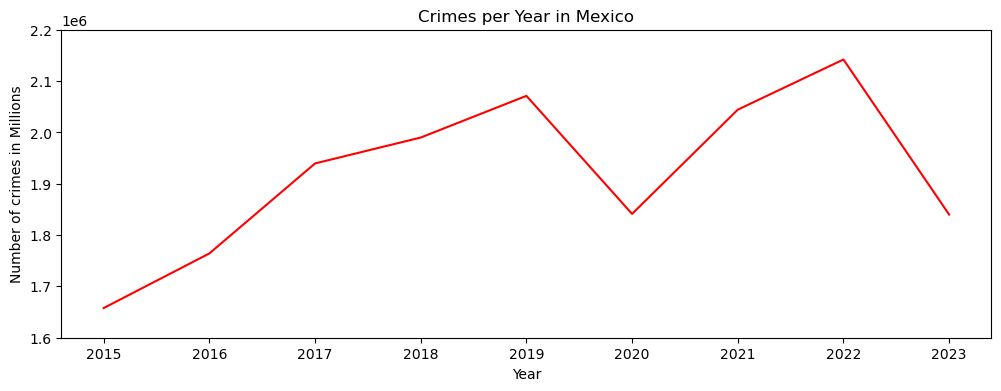

In [46]:
#Crimes per Year
plt.figure(figsize=(12,4))
#ax = sns.barplot(data=crimes_in_mexico,x='year',y='count',estimator=sum,errorbar=None,color='red',saturation=0.5)
sns.lineplot(data=crimes_in_mexico,x='year',y='count',estimator="sum",errorbar=None,color='red')
plt.title('Crimes per Year in Mexico')
plt.ylim(1.6e6,2.2e6)
plt.xlabel('Year')
plt.ylabel('Number of crimes in Millions')
plt.ticklabel_format(style='sci',axis='y')
plt.show()

* Number of feminicides per year

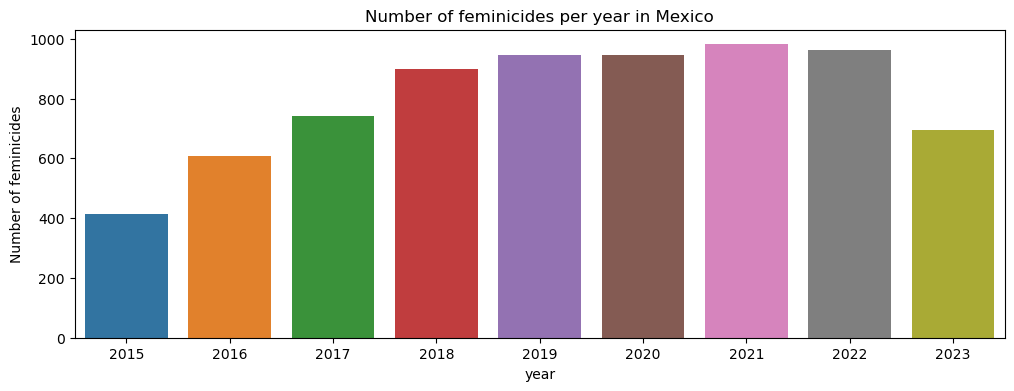

In [47]:
feminicides_per_year = crimes_in_mexico[(crimes_in_mexico['type_of_crime'] == "Feminicide") & (crimes_in_mexico['count'] >= 1)]
feminicides_per_year = feminicides_per_year[['year','count']].groupby(by='year').sum().reset_index()
plt.figure(figsize=(12,4))
sns.barplot(data=feminicides_per_year,x='year',y='count')
plt.ylabel("Number of feminicides")
plt.title("Number of feminicides per year in Mexico")
plt.show()

* Crimes per Entity

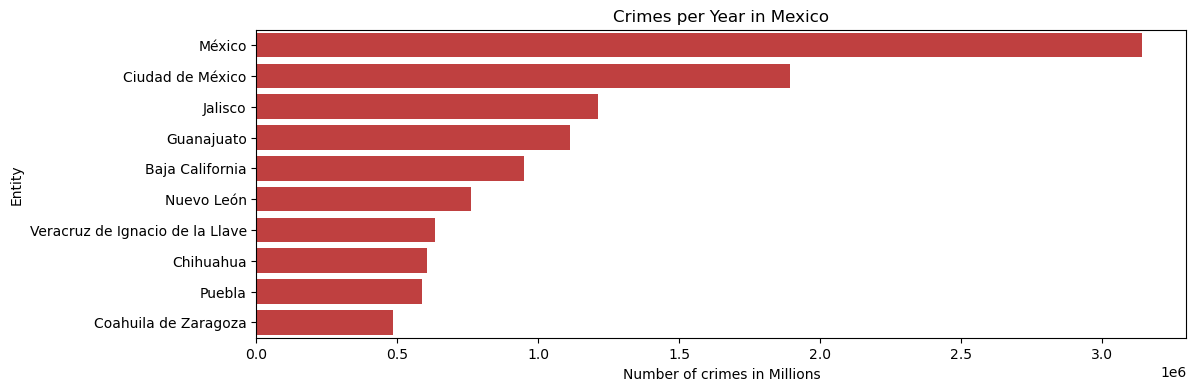

In [48]:
##Crimes in the top 10 entities
top_ten_entities = crimes_in_mexico[['entity','count']].groupby(by='entity').sum().reset_index().sort_values(by='count',ascending=False)[:10]

plt.figure(figsize=(12,4))
ax = sns.barplot(data=top_ten_entities,y='entity',x='count',estimator=sum,errorbar=None,color='red',saturation=0.5)
plt.title('Crimes per Year in Mexico')
#plt.ylim(0,crimes_per_year['count'].max())
plt.ylabel('Entity')
plt.xlabel('Number of crimes in Millions')
#plt.ticklabel_format(style='sci',axis='y')
plt.show()

* TOP 3 types of crime in Mexico

In [49]:
types_of_crimes_total = crimes_in_mexico[['type_of_crime','count']].groupby(by='type_of_crime').sum().reset_index().sort_values(by='count',ascending=False)
types_of_crimes_total['Percentage'] = round(types_of_crimes_total['count'] / types_of_crimes_total['count'].sum() * 100,2)
top_3_crimes = types_of_crimes_total[:3]
top_3_crimes

,type_of_crime,count,Percentage
34,Robbery,6031768,34.89
9,Domestic violence,1830348,10.59
22,Injuries,1808209,10.46


We can see that Robbery is about one-third of the total crimes commited in Mexico, so let's go deeper on this crime

In [50]:
robbery_subtypes = crimes_in_mexico[crimes_in_mexico['type_of_crime'] == 'Robbery']
robbery_subtypes[['subtype_of_crime','count','modality']].groupby(['subtype_of_crime','modality']).sum().reset_index().sort_values(by='count',ascending=False)[:6]

,subtype_of_crime,modality,count
29,Other Thefts,Without violence,1409868
23,Motor Vehicle Theft,4-wheel car theft Without violence,788997
11,Home Burglary,Without violence,603662
34,Street Robbery,With violence,504542
5,Business Robbery,Without violence,443207
22,Motor Vehicle Theft,4-wheel car theft With violence,421275


* Relation betwwen month and number of crimes

<Axes: xlabel='year', ylabel='month'>

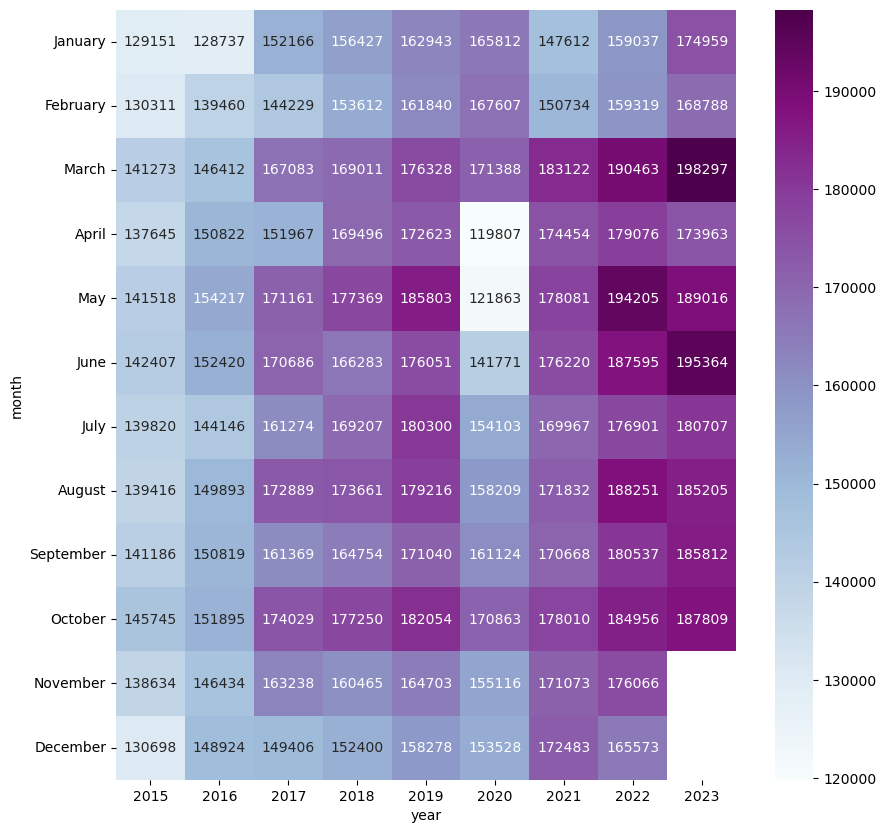

In [87]:
crimes_per_month = crimes_in_mexico[['month','year','count']]
crimes_per_month = crimes_per_month.pivot_table(values='count',aggfunc="sum",columns="year",index="month")
crimes_per_month_without_order = crimes_per_month
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crimes_per_month = crimes_per_month.reindex(new_order, axis=0)

plt.figure(figsize=(10,10))
sns.heatmap(crimes_per_month,annot=True,fmt="0.0f",cmap="BuPu")